In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import math
import random
import networkx
from sympy import *             

In [2]:
def A_layer_dynamics() :
    for i in range(0, 100) :
        for k in range(1, 4) :
            if A[IA[i*4]]* A[IA[i+k]] == 1 :
                z1 = random.random()
                if z1 < prob_p :
                    A[IA[i*4]] = 2
                    A[IA[i+k]] = 2
            elif A[IA[i*4]]* A[IA[i+k]] == 2 :
                z2 = random.random()
                if z2 < prob_p :
                    A[IA[i*4]] = 2
                    A[IA[i+k]] = 2 
            elif A[IA[i*4]]* A[IA[i+k]] == -1 :
                z3 = random.random()
                if z3 > prob_p :
                    A[IA[i*4]] = -1
                    A[IA[i+k]] = -1
            elif A[IA[i*4]]* A[IA[i+k]] == -2 :
                z4 = random.random()
                if z4 < prob_p :
                    if A[IA[i*4]] > 0 :
                        A[IA[i*4]] = 1
                        A[IA[i+k]] = +1
                    elif A[IA[i*4]] < 0 :
                        A[IA[i*4]] = -1
                        A[IA[i+k]] = +1
        if A[i] * B[i] == -1 :
            z5 = random.random()
            if z5 < prob_q :
                A[i] = -A[i]
        elif A[i] * B[i] == -2 :
            z6 = random.random()
            if z6 < prob_q :
                if A[i] > 0 :
                    A[i] = 1
                elif A[i] < 0 :
                    A[i] = -A[i]
    return A

def B_layer_dynamics() :
    for i in range(0, 100) :
        opposite = []
        for k in range(1, 4) :
            if B[i] * B[IB[i+k]] < 0 :
                opposite.append(1)
        if B[i] * A[i] < 0 :
            opposite.append(1)
        prob_beta = ((sum(opposite))/5)**beta
        z7 = random.random()
        if z7 < prob_beta :
            B[i] = -B[i] 
    return B

def interconnected_dynamics() :
    for i in range(0,100) :
        A_layer_dynamics()
        B_layer_dynamics()
    return A, B


def repeated_and_mean() :
    global A, B, mean_P
    P = [] 
    for i in range(0, 10) :
        A = [1, 2]*50
        B = [-1]*100
        interconnected_dynamics()
        P.append(sum(B)/ 100)
    mean_P = sum(P)/10

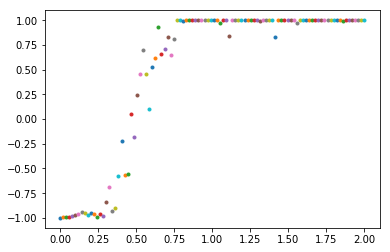

In [5]:
connect_line_A = []
connect_line_B = []
connect_line_I = []
IA = []
IB = []
for j in range(0, 100) :
    connect_line_A.append(j)
    connect_line_B.append(j)
    connect_line_I.append(j)
for i in range(0, 100) :
    random.shuffle(connect_line_A)
    random.shuffle(connect_line_B)
    IA += connect_line_A[0:4]
    IB += connect_line_A[0:4]
D = np.linspace(0, 2, 100)  # reinforcement r space  for the graph according to r changes
beta = 3                    # volatility 

for r in D :
    C = np.array([[1, 1], [1, -r]])  # p + q = 1, r = p / q
    C_inv=np.linalg.inv(C)
    pq=C_inv * np.array([[1, 0]])  # deriving probability p, q 
    prob_p = pq[0,0]  # probability p 
    prob_q=pq[1,0]    # probability q 
    repeated_and_mean()
    plt.plot(r, mean_P,'.')

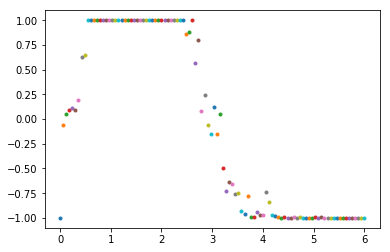

In [7]:
connect_line_A = []
connect_line_B = []
connect_line_I = []
IA = []
IB = []
for j in range(0, 100) :
    connect_line_A.append(j)
    connect_line_B.append(j)
    connect_line_I.append(j)
for i in range(0, 100) :
    random.shuffle(connect_line_A)
    random.shuffle(connect_line_B)
    IA += connect_line_A[0:4]
    IB += connect_line_A[0:4]
D = np.linspace(0, 6, 100)  # reinforcement r space  for the graph according to r changes
r = 0.5
C = np.array([[1, 1], [1, -r]])  # p + q = 1, r = p / q
C_inv=np.linalg.inv(C)
pq=C_inv * np.array([[1, 0]])  # deriving probability p, q 
prob_p = pq[0,0]  # probability p 
prob_q=pq[1,0]    # probability q 
for beta in D :
    repeated_and_mean()
    plt.plot(beta, mean_P, '.')

In [30]:
   r

5.0

AttributeError: 'list' object has no attribute 'reshape'

In [93]:
connect_line_B = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
B= [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
A= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
opposite = []
for i in range(0, 9) :
    random.shuffle(connect_line_B)
    I = connect_line_B[0:4]
    for k in range(0, 4) :
        if B[i] * B[I[k]] < 0 or B[i] * A[i] <0 :
            opposite.append(1)
            print(sum(opposite))
       

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [3]:
D = np.linspace(0, 5, 2)  # reinforcement r space  for the graph according to r changes
beta = 1  # volatility : 1
for r in D :
    C = np.array([[1, 1], [1, -r]])  # p + q = 1, r = p / q
    C_inv=np.linalg.inv(C)
    pq=C_inv * np.array([[1, 0]])  # deriving probability p, q 
    prob_p = pq[0,0]  # probability p 
    prob_q=pq[1,0]    # probability p 
    z = random.random()
    for i in range(0, 100) :
        for j in range(0, 5) :
            for k in range(0, 100) :
                for l in range(0, 5) :
                    while True :
                        if connecting[i][j] >= 0 and connecting[k][l] >= 0 :
                            if z <= prob_p :
                                if A[connecting[i][j]] * A[connecting[k][l]] == 2 :
                                    A[connecting[i][j]] == 2 
                                    A[connecting[k][l]] == 2
                            elif z > prob_p :
                                if A[connecting[i][j]] * B[connecting[i][j]] == -1 :
                                    if A[connecting[i][j]] > 0 :
                                        A[connecting[i][j]] == -1
                                    elif A[connecting[i][j]] < 0 :
                                        A[connecting[i][j]] == 1
                                elif A[connecting[i][j]] * B[connecting[i][j]] == -2 :
                                    A[connecting[i][j]] == 1
                        elif not(connecting[i][j] >= 0 and connecting[k][l] >= 0) :
                            continue

NameError: name 'connecting' is not defined

In [4]:

D = np.linspace(0, 5, 2)  # reinforcement r space  for the graph according to r changes
beta = 1  # volatility : 1
for r in D :
    C = np.array([[1, 1], [1, -r]])  # p + q = 1, r = p / q
    C_inv=np.linalg.inv(C)
    pq=C_inv * np.array([[1, 0]])  # deriving probability p, q 
    prob_p = pq[0,0]  # probability p 
    prob_q=pq[1,0]    # probability p 
    for i1 in range(0,100) :
        A1 = A[i1]
        while True :
            i2 = random.randint(0, 99)
            if not(i1==i2) :
                A2 = A[i2]
                break
            if i1==i2 :
                continue
        while True :
            i3 = random.randint(0, 99)
            if not(i2==i3) :
                A3 = A[i3]
                break
            if i2==i3 :
                continue
        while True :
            i4 = random.randint(0, 99)
            if not(i3==i4) :
                A4 = A[i4]
                break
            if i2==i3 :
                continue             # A layer internal degree : 4  
        Alayer = [A1, A2, A3, A4]
        print(Alayer)
        Alayer = 
        while True :
            i2 = random.randint(0, 100)
            
            if not(i1==i2) :
                A2 = A[i2]
                if A[i] * A[i2] == 2 :
                    if z <= prob_p :
                        A[i] == 2
                        A[i2] == 2
                break
            if i == i2 :
                continue
    while True :
        i3 = random.randint(0, 99)
        if not(i2==i3) :
            A3 = A[i3]
            break
        if i2==i3 :
            continue
    while True :
        i4 = random.randint(0, 99)
        if not(i3==i4) :
            A4 = A[i4]
            break
        if i2==i3 :
            continue             # A layer internal degree : 4  
    

SyntaxError: invalid syntax (<ipython-input-4-1f0fd10448f8>, line 35)